# Python Lab 04b: Agaricus-Lepiota ed SVM Lineari
## Francesco Della Santa, Matematica per l'Intelligenza Artificiale, Politecnico di Torino

In questo notebook riprendiamo il dataset _Agaricus-Lepiota_ di alcune lezioni fa (esercitazione sul _Label Encoding_ ed il _One-hot Encoding_). Nell'esercitazione di oggi applicheremo la PCA e le SVM lineari su questo dataset.

**ATTENZIONE:** Questa esercitazione richiederà una maggior partecipazione dello studente. Le celle di codice non dovranno essere solamente completate ma, in certi casi, interamente scritte. Tuttavia, un buon "riciclo" dei codici delle esercitazioni precedenti permette di velocizzare/semplificare notevolmente il lavoro.


## Documentazione Allegata al Dataset

1. Title: Mushroom Database

2. Sources: 
    1. Mushroom records drawn from The Audubon Society Field Guide to North American Mushrooms (1981). G. H. Lincoff (Pres.), New York: Alfred A. Knopf
    2. Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    3. Date: 27 April 1987

3. Past Usage:
    1. Schlimmer,J.S. (1987). Concept Acquisition Through Representational Adjustment (Technical Report 87-19).  Doctoral disseration, Department of Information and Computer Science, University of California, Irvine. --- STAGGER: asymptoted to 95% classification accuracy after reviewing 1000 instances.
    2. Iba,W., Wogulis,J., & Langley,P. (1988).  Trading off Simplicity and Coverage in Incremental Concept Learning. In Proceedings of the 5th International Conference on Machine Learning, 73-79. Ann Arbor, Michigan: Morgan Kaufmann. -- approximately the same results with their HILLARY algorithm.
    3. In the following references a set of rules (given below) were learned for this data set which may serve as a point of comparison for other researchers.
    
    Duch W, Adamczak R, Grabczewski K (1996) Extraction of logical rules from training data using backpropagation networks, in: Proc. of the 1st Online Workshop on Soft Computing, 19-30.Aug.1996, pp. 25-30, available on-line at: http://www.bioele.nuee.nagoya-u.ac.jp/wsc1/
    
    Duch W, Adamczak R, Grabczewski K, Ishikawa M, Ueda H, Extraction of crisp logical rules using constrained backpropagation networks - comparison of two new approaches, in: Proc. of the European Symposium on Artificial Neural Networks (ESANN'97), Bruge, Belgium 16-18.4.1997, pp. xx-xx
    
    Wlodzislaw Duch, Department of Computer Methods, Nicholas Copernicus University, 87-100 Torun, Grudziadzka 5, Poland e-mail: duch@phys.uni.torun.pl , http://www.phys.uni.torun.pl/kmk/
    
    Date: Mon, 17 Feb 1997 13:47:40 +0100
    
    From: Wlodzislaw Duch <duch@phys.uni.torun.pl>
    
    Organization: Dept. of Computer Methods, UMK

    I have attached a file containing logical rules for mushrooms. It should be helpful for other people since only in the last year I have seen about 10 papers analyzing this dataset and obtaining quite complex rules. We will try to contribute other results later.

    With best regards, Wlodek Duch
    
    ________________________________________________________________

    Logical rules for the mushroom data sets.

    Logical rules given below seem to be the simplest possible for the mushroom dataset and therefore should be treated as benchmark results.
    
    Disjunctive rules for poisonous mushrooms, from most general to most specific:

    P_1) odor=NOT(almond.OR.anise.OR.none): 120 poisonous cases missed, 98.52% accuracy

    P_2) spore-print-color=green: 48 cases missed, 99.41% accuracy
         
    P_3) odor=none.AND.stalk-surface-below-ring=scaly.AND.(stalk-color-above-ring=NOT.brown): 8 cases missed, 99.90% accuracy
         
    P_4) habitat=leaves.AND.cap-color=white: 100% accuracy.
    Rule P_4) may also be

    P_4') population=clustered.AND.cap_color=white
    These rule involve 6 attributes (out of 22). Rules for edible mushrooms are obtained as negation of the rules given above, for example the rule:

    odor=(almond.OR.anise.OR.none).AND.spore-print-color=NOT.green gives 48 errors, or 99.41% accuracy on the whole dataset.

    Several slightly more complex variations on these rules exist, involving other attributes, such as gill_size, gill_spacing, stalk_surface_above_ring, but the rules given above are the simplest we have found.


4. Relevant Information:
    
    This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

5. Number of Instances: 8124

6. Number of Attributes: 22 (all nominally valued): 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'.

7. Attribute Information: (classes: edible=e, poisonous=p)
     - 01 *cap-shape:*
        
        bell=b, conical=c, convex=x, flat=f, knobbed=k,sunken=s
     - 02 *cap-surface:*
        
        fibrous=f, grooves=g, caly=y, smooth=s
     - 03 *cap-color:*
        
        brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p,purple=u,red=e,white=w,yellow=y
     - 04 *bruises?:*

        bruises=t, no=f
     - 05 *odor:*

        almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
     - 06 *gill-attachment:*

        attached=a, descending=d, free=f, notched=n
     - 07 *gill-spacing:*

        close=c, crowded=w, distant=d
     - 08 *gill-size:*

        broad=b, narrow=n
     - 09 *gill-color:*

        black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
    - 10 *stalk-shape:*

        enlarging=e, tapering=t
    - 11 *stalk-root:*

        bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
    - 12 *stalk-surface-above-ring:*

        fibrous=f, scaly=y, silky=k, smooth=s
    - 13 *stalk-surface-below-ring:*

        fibrous=f, scaly=y, silky=k, smooth=s
    - 14 *stalk-color-above-ring:*

        brown=n, buff=b, cinnamon=c, gray=g, orange=o,pink=p,red=e, white=w, yellow=y
    - 15 *stalk-color-below-ring:*

        brown=n,buff=b, cinnamon=c, gray=g, orange=o, pink=p,red=e, white=w, yellow=y
    - 16 *veil-type:*

        partial=p, universal=u
    - 17 *veil-color:*

        brown=n, orange=o, white=w, yellow=y
    - 18 *ring-number:*

        none=n, one=o, two=t
    - 19 *ring-type:*

        cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
    - 20 *spore-print-color:*

        black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
    - 21 *population:*

        abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
    - 22 *habitat:*

        grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

8. Missing Attribute Values: 2480 of them (denoted by "?"), all for attribute 11.

9. Class Distribution (first column of the dataset): 
    1. edible (e): 4208 (51.8%)
    2. poisonous (p): 3916 (48.2%)
    3. total: 8124 instances


## Caricamento e Preprocessamento del Dataset

**ATTENZIONE:** si lascia allo studente la scelta di quali moduli importare e come importarli.

In [1]:
# ***** NOTA BENE! *****
# perché %matplotlib widget funzioni, installare nell'ambiente virtuale 
# il pacchetto ipympl con il comando:
# pip install ipympl
#
# ATTENZIONE: perché funzioni è necessario chiudere e rilanciare jupyter-lab
#
# STILE DI VISUALIZZAZIONE PLOT FATTI CON MATPLOTLIB
%matplotlib widget
#
#
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from IPython.display import display

### Caricamento e Preparazione Base del Dataset

Caricamento del dataset effettuato come nella scorsa esercitazione.

**ATTENZIONE:** controllare che il percorso del file sia correttamente indicato.

In [2]:
mushrooms = pd.read_csv('agaricus-lepiota.data', header=None)

display(mushrooms)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


#### Assegnazione Nomi a Colonne Dataset

In [3]:
col_names = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 
             'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
             'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 
             'spore-print-color', 'population', 'habitat']
rename_dict = {k: col_names[k] for k in range(23)}

mushrooms.rename(columns=rename_dict, inplace=True)

display(mushrooms)

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


#### Conversione dei Dati in "categorical"

In [4]:
mushrooms = mushrooms.astype('category')

## Encoding del Dataset

(... saltiamo la parte di esplorazione del dataset, già svolta nell precedente esercitazione...)

**Esercizio:** scrivere nella cella di codice seguente i comandi necessari ad effettuare un one-hot encoding rispetto alle features ed un label encoding rispetto ai target. Il tutto fatto su una _COPIA_ del dataset originale.

In [5]:
# LEGENDA VARIABILI DA USARE:
# mushrooms_work : copia del dataframe mushrooms che verrà trasformato rispetto il nuovo encoding

# Copy of the dataframe
mushrooms_work = mushrooms.copy()

# Label Encoding
labelenc_class = LabelEncoder()
labelenc_class.fit(mushrooms_work['class'].values)
mushrooms_work['class'] = labelenc_class.transform(mushrooms_work['class'].values)

# One-hot Encoding
onehot_cols = mushrooms_work.columns.to_list()[1:]  # lo slicing '[1:]' serve a prenderle tutte meno la prima che è 'class'
mushrooms_work = pd.get_dummies(mushrooms_work, columns=onehot_cols)

display(mushrooms_work)

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,False,True,False
1,0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,1,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
8120,0,False,False,False,False,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,False
8121,0,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
8122,1,False,False,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


## Preparazione dei Dati

**Esercizio:** estrarre dal dataframe *mushrooms_work* la matrice $X$ delle features ed il vettore $\boldsymbol{y}$ delle classi (corrispondenti alle righe di $X$). Dopodiché determinare le matrici $X_{\mathrm{train}}, X_{\mathrm{test}}$ ed i vettori $\boldsymbol{y}_{\mathrm{train}}, \boldsymbol{y}_{\mathrm{test}}$ rappresentanti rispettivamente il *training* ed il *test* set. La percentuale di suddivisione del dataset in *training-test* deve essere *50%-50%*; il *random seed* uguale a $42$.

**SUGGERIMENTO:** si utilizzi la funzione *train_test_split* del sottomdulo *model_selection* di *sklearn*, leggendo con attenzione [la documentazione ufficiale](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). **Attenzione:** verificare che sklearn ed il rispettivo sottomodulo sia importati per poter utilizzare questa funzione!

In [6]:
# LEGENDA VARIABILI DA USARE:
# X : matrice delle features di mushrooms_work
# y : vettore delle classi di mushrooms_work
# X_train, X_test: matrici delle features di training e test set, rispettivamente, ottenute da X
# y_train, y_test: vettiri delle classi di training e test set, rispettivamente, ottenuti da y

X = mushrooms_work.iloc[:, 1:].values
y = mushrooms_work['class'].values

random_seed = 42  # Random seed caratterizzante la suddivisione in training e test set
test_p = 0.5  # Percentuale di dati da utilizzare come test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_p, random_state=random_seed, shuffle=True)

## PCA

**Esercizio:** eseguire la PCA su $X_{\mathrm{train}}$ *senza riduzione della dimensionalità*, per visualizzare l'andamento della varianza spiegata all'aumentare delle PC.

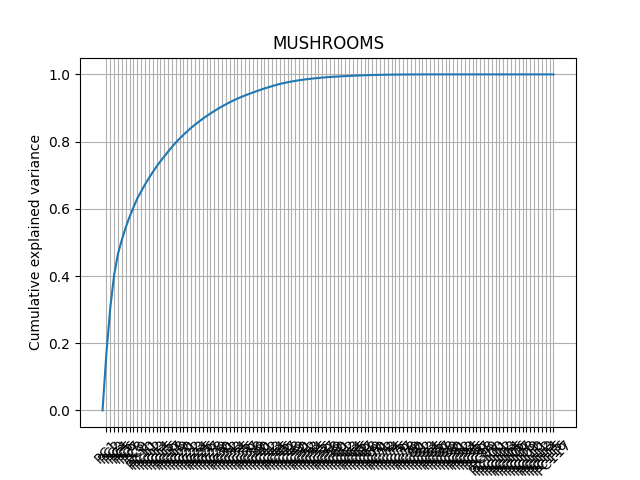

In [7]:
# LEGENDA VARIABILI DA USARE:
# pca_global : oggetto PCA che NON effettua riduzione di dimensionalità

pca_global = PCA()
pca_global.fit(X_train)

plt.figure()
plt.plot(np.insert(np.cumsum(pca_global.explained_variance_ratio_), 0, 0))
plt.title('MUSHROOMS')
plt.xticks(ticks=np.arange(1, pca_global.n_components_ + 1), 
           labels=[f'PC{i}' for i in range(1, pca_global.n_components_ + 1)],
           rotation=45)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

**Esercizio:** eseguire la PCA su $X_{\mathrm{train}}$ preservando una percentuale di varianza spiegata pari almeno a *explvar_p=0.90*. Visualizzare il numero di PC selezionate.

In [11]:
# LEGENDA VARIABILI DA USARE:
# pca : oggetto PCA che effettua riduzione di dimensionalità

explvar_p = 0.9

pca = PCA(explvar_p)
pca.fit(X_train)

df_pca = pd.DataFrame({'val': [pca.n_components_, np.round(pca.explained_variance_ratio_.sum()*100,decimals=2)]}, index=['n. PC', 'expl. Var. (%)'])
display(df_pca)

,val
n. PC,31.00
expl. Var. (%),90.47


## SVM Lineari

**Esercizio:** testare le SVM lineari (con i paramteri forniti) per la predizione della classe. Nello specifico si applichino le SVM sia al problema "completo" che a quello di dimensione ridotta tramite PCA. Per quest'ultimo, visualizzare poi i dati in $\mathbb{R}^2$ rispetto alle prime due PC e in $\mathbb{R}^3$ rispetto le prime 3 PC.

,acc. (no PCA),acc. (PCA)
training,1.0,99.410000
test,1.0,0.995323


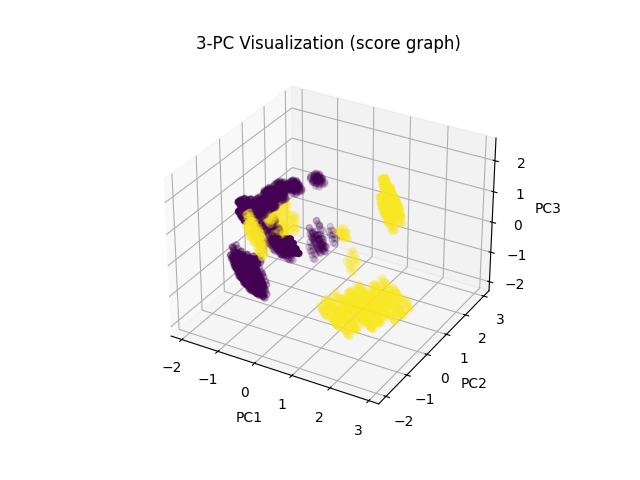

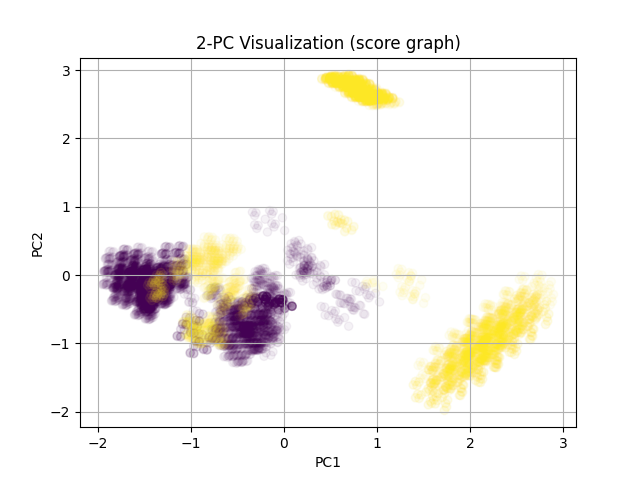

In [20]:
C_hard = 1e8
loss = 'squared_hinge'
dual = False

# LEGENDA VARIABILI DA USARE:
# lsvm_hard : oggetto LinearSVC da applicare ai dati senza PCA
# lsvm_hard_pca: oggetto LinearSVC da applicare ai dati senza PCA

lsvm_hard = LinearSVC(C=C_hard, loss=loss, dual=dual, random_state=random_seed)
lsvm_hard_pca = LinearSVC(C=C_hard, loss=loss, dual=dual, random_state=random_seed)

lsvm_hard.fit(X_train, y_train)
lsvm_hard_pca.fit(pca.transform(X_train), y_train)

df_lsvm_hard = pd.DataFrame({'acc. (no PCA)': [lsvm_hard.score(X_train, y_train), lsvm_hard.score(X_test, y_test)],
                             'acc. (PCA)': [np.round(lsvm_hard_pca.score(pca.transform(X_train), y_train)*100,decimals=2), lsvm_hard_pca.score(pca.transform(X_test), y_test)]},
                            index=['training', 'test'])
display(df_lsvm_hard)


Zpca = pca.transform(X)


plt.figure()
plt.scatter(Zpca[:, 0], Zpca[:, 1], c=y, alpha=0.05)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.title('2-PC Visualization (score graph)')

fig3PC = plt.figure()
ax = fig3PC.add_subplot(111, projection='3d')
ax.scatter(Zpca[:, 0], Zpca[:, 1], Zpca[:, 2], c=y, alpha=0.15)
plt.title('3-PC Visualization (score graph)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.grid()
plt.show()

